This is an example of using AutoMol:
- Training dataset: QM9
- Training features: fingerprints
- Feature to learn: HOMO energy
- Model: RandomForest
- Problem: regression
- Dataset location: local
- Hyper parameter: GridSearchCV
- CV: 5
- No custom features

In [1]:
if'automol'in globals(): import importlib; importlib.reload(automol)

In [2]:
from automol.pipeline import Pipeline

In [3]:
config_yaml = 'qm9_dataset_example_5_hyper_param.yaml'
pipeline = Pipeline(config_yaml)
pipeline.print_spec()

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amount: 200
cv: 5
dataset_class: QM9
dataset_location: ../data/dsgdb9nsd
dataset_split_test_size: 0.1
features:
- fingerprint
hyper_param_grid:
  RandomForestRegressor:
    max_depth:
    - 3
    - 5
    - 10
label: homo
mlflow_experiment: qm9_dataset_automol_demo
models_filter:
- git_uri: sklearn
  model_names:
  - RandomForestRegressor
  whitelist: 1
problem: regression
train_test_splits: 2



In [4]:
pipeline.train()

Got the feature homo from the current dataset.
Checking if the feature fingerprint can be generated.
Got the generated feature fingerprint.
Running model RandomForestRegressor with feature fingerprint.


2021/03/17 22:58:15 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/d0a7ddde867a46068c3ac3ed6b62ef70/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
2021/03/17 22:58:18 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/d0a7ddde867a46068c3ac3ed6b62ef70/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, c

Running model RandomForestRegressor with feature fingerprint.


2021/03/17 22:58:44 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/236bc9234098405ca0fbe8f398fb292e/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
2021/03/17 22:58:47 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/24/236bc9234098405ca0fbe8f398fb292e/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, c

In [5]:
pipeline.get_statistics()

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,feature,split_index,training_mae,training_mse,training_r2_score,test_mae,test_mse,test_r2_score,best_cv_score,training_rmse,training_score
0,RandomForestRegressor,fingerprint,0,0.006367,0.000083,0.854760,0.008689,0.000110,0.333534,0.230386,0.009106,0.854760
1,RandomForestRegressor,fingerprint,1,0.009126,0.000141,0.744861,0.011196,0.000245,0.285787,0.175944,0.011878,0.744861


In [6]:
pipeline.get_cv_results('RandomForestRegressor', 'fingerprint', split_index=0)

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.619799,0.112431,0.007931,0.002776,3,{'max_depth': 3},0.245630,-0.054345,0.123703,0.136474,0.192075,0.128707,0.101272,3
1,0.842328,0.012568,0.006242,0.000084,5,{'max_depth': 5},0.326237,0.039676,0.161453,0.243995,0.272180,0.208708,0.099892,2
2,1.460754,0.021894,0.006586,0.000208,10,{'max_depth': 10},0.354518,0.136224,0.155253,0.264407,0.241527,0.230386,0.078996,1


/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


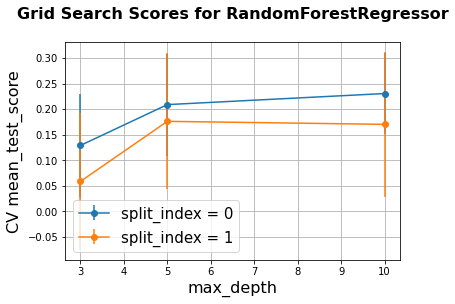

In [7]:
pipeline.plot_grid_search('RandomForestRegressor', 'fingerprint', 'max_depth')